### 01. pandas 란?
- 데이터분석에서 R보다 파이썬이 인기있어진 이유는? 판다스 !!

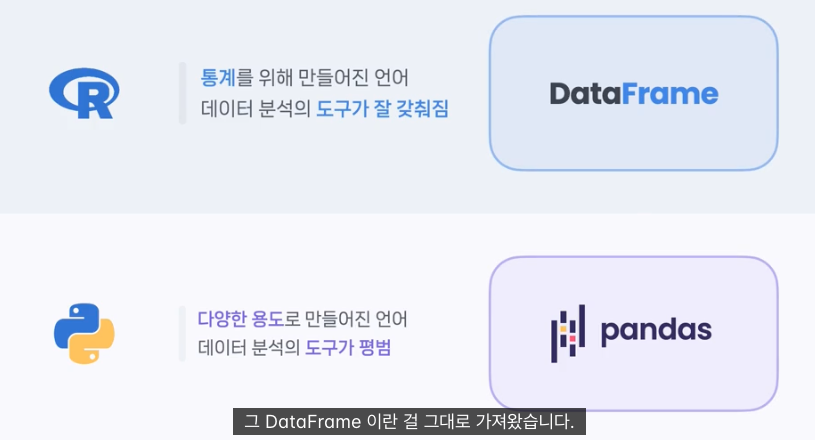

#### numpy vs. 판다스
- 판다스가 numpy를 이용해서 만들어짐
    - numpy의 기본 기능들은 판다스에 다 있고 여기에 +a (외부데이터 읽고 쓰기, 정리된 데이터 새로운 파일에 저장, 데이터 시각화)
- 특히 표 형식의 데이터를 다루는데 유리! (원래 표 형식의 데이터가 많기 때문에.. 데이터 사이언스의 필수도구)
- numpy는 숫자로 원하는 데이터를 찾을 수 있음
- pandas는 정해준 이름으로(인덱스) 값을 찾을 수 있음

### 02. DataFrame 소개
- 2차원 형태의 데이터를 다루기 위한 자료형
- (대부분의 데이터는 2차원 형태..!)

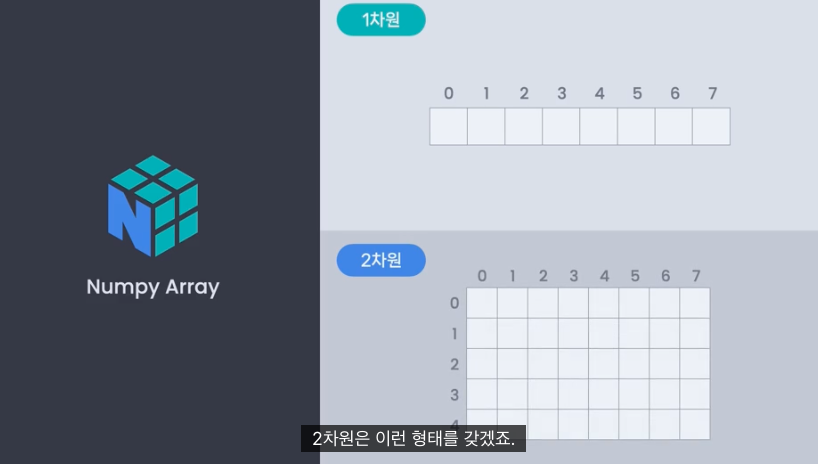

#### 행 (Rows / Index)
- = 레코드

#### 열 (Columns)
- 각 데이터의 특징을 담음


### 03. DataFrame 사용해보기
- pd.DataFrame((리스트 이름, index=[원하는 행 인덱스 설정], columns=[원하는 열 이름 설정])
- df.columns
- df.index

In [3]:
# pandas 불러오기
import pandas as pd

# 2차원 리스트를 DataFrame으로 변환하는 케이스
two_dimensional_list = [['동욱', 50, 50], ['신휘', 89, 31], ['익중', 68, 91], ['윤수', 88, 75]]

# Dataframe에 해당 리스트 넣기!
# DataFrame이 될 변수 : my_df
my_df = pd.DataFrame(two_dimensional_list, index=['a', 'b', 'c', 'd'], columns = ['name', 'eng_score', 'math_score'])
my_df

,name,eng_score,math_score
a,동욱,50,50
b,신휘,89,31
c,익중,68,91
d,윤수,88,75


In [4]:
type(my_df)

pandas.core.frame.DataFrame

In [5]:
# array와는 다르게 다양한 자료형을 담고 있는 DF
# 칼럼 내에서는 같은 자료형!!
my_df.dtypes

name          object
eng_score      int64
math_score     int64
dtype: object

### 04. DataFrame을 만드는 다양한 방법

#### 2차원 리스트 / 2차원 numpy array -> DataFrame

In [6]:
import numpy as np
import pandas as pd

two_dimensional_list = [['dongwook', 50, 86], ['sineui', 89, 31], ['ikjoong', 68, 91], ['yoonsoo', 88, 75]]
two_dimensional_array = np.array(two_dimensional_list)
# pandas Sereis를 담고 있는 리스트
list_of_series = [
    pd.Series(['dongwook', 50, 86]), 
    pd.Series(['sineui', 89, 31]), 
    pd.Series(['ikjoong', 68, 91]), 
    pd.Series(['yoonsoo', 88, 75])
]

# 아래 셋은 모두 동일합니다
# DataFrame 변환 공식에 바꾸고자 하는 데이터를 넣어주면 완료!
df1 = pd.DataFrame(two_dimensional_list)
df2 = pd.DataFrame(two_dimensional_array)
df3 = pd.DataFrame(list_of_series)

print(df1)

          0   1   2
0  dongwook  50  86
1    sineui  89  31
2   ikjoong  68  91
3   yoonsoo  88  75


#### 파이썬 딕셔너리(사전) -> DataFrame
- 사전의 key: column 이름
- 사전의 value : 그 column에 해당하는 리스트, numpy array, 혹은 pandas Series

In [7]:
import numpy as np
import pandas as pd

# 리스트가 담긴 사전
names = ['dongwook', 'sineui', 'ikjoong', 'yoonsoo']
english_scores = [50, 89, 68, 88]
math_scores = [86, 31, 91, 75]

dict1 = {
    'name': names, 
    'english_score': english_scores, 
    'math_score': math_scores
}

dict2 = {
    'name': np.array(names), 
    'english_score': np.array(english_scores), 
    'math_score': np.array(math_scores)
}

dict3 = {
    'name': pd.Series(names), 
    'english_score': pd.Series(english_scores), 
    'math_score': pd.Series(math_scores)
}


# 아래 셋은 모두 동일합니다
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)
df3 = pd.DataFrame(dict3)

print(df1)


       name  english_score  math_score
0  dongwook             50          86
1    sineui             89          31
2   ikjoong             68          91
3   yoonsoo             88          75


#### 사전이 담긴 리스트 -> DF

In [8]:
import numpy as np
import pandas as pd

my_list = [
    {'name': 'dongwook', 'english_score': 50, 'math_score': 86},
    {'name': 'sineui', 'english_score': 89, 'math_score': 31},
    {'name': 'ikjoong', 'english_score': 68, 'math_score': 91},
    {'name': 'yoonsoo', 'english_score': 88, 'math_score': 75}
]

df = pd.DataFrame(my_list)
print(df)

       name  english_score  math_score
0  dongwook             50          86
1    sineui             89          31
2   ikjoong             68          91
3   yoonsoo             88          75


### 05. [실습] 스타들의 생일은 언제?

In [9]:
## 방법 : 딕셔너리 -> 데이터 프레임
# 사전을 데이터 프레임으로 전환
import pandas as pd

names = ['Taylor Swift', 'Aaron Sorkin', 'Harry Potter', 'Ji-Sung Park']
birthdays = ['December 13, 1989', 'June 9, 1961', 'July 31, 1980', 'February 25, 1981']
occupations = ['Singer-songwriter', 'Screenwriter', 'Wizard', 'Footballer']

# 1. 사전 만들기
dict = {
    'name' : names,
    'birthday' : birthdays,
    'occupation' : occupations
}

# 2. 데이터프레임에 넣기
df = pd.DataFrame(dict)
df

,name,birthday,occupation
0,Taylor Swift,"December 13, 1989",Singer-songwriter
1,Aaron Sorkin,"June 9, 1961",Screenwriter
2,Harry Potter,"July 31, 1980",Wizard
3,Ji-Sung Park,"February 25, 1981",Footballer


### 06. pandas의 데이터 타입
- df.dtypes
- 한 Column 내에서는 모든 값이 동일한 데이터 타입

- name : object 라는 데이터 타입을 '보관'    
...

#### pandas의 dtype 들

### 07. pandas로 데이터 읽어들이기
- pd.read_csv('경로/파일이름.csv')

In [13]:
# pd.read_csv() 함수는 
# 1. dataframe을 return 한다.
# 2. csv 파일의 첫줄을 알아서 헤더로 가져옴  -> 엉뚱한 header 만들지 않으려면 지정 필수.
df = pd.read_csv('data/iphone.csv') # header = None
df


,0,1,2,3,4,5
0,NaN,출시일,디스플레이,메모리,출시 버전,Face ID
1,iPhone 7,2016-09-16,4.7,2GB,iOS 10.0,No
2,iPhone 7 Plus,2016-09-16,5.5,3GB,iOS 10.0,No
3,iPhone 8,2017-09-22,4.7,2GB,iOS 11.0,No
4,iPhone 8 Plus,2017-09-22,5.5,3GB,iOS 11.0,No
5,iPhone X,2017-11-03,5.8,3GB,iOS 11.1,Yes
6,iPhone XS,2018-09-21,5.8,4GB,iOS 12.0,Yes
7,iPhone XS Max,2018-09-21,6.5,4GB,iOS 12.0,Yes


### => 특정 칼럼을 row 이름으로 설정하고 싶을때 !?
- index_col = 0 
    - 0번 열 인덱스의 칼럼 값들을 row 이름으로 가져온다.

In [14]:
df = pd.read_csv('data/iphone.csv', index_col = 0) 
df

,출시일,디스플레이,메모리,출시 버전,Face ID
iPhone 7,2016-09-16,4.7,2GB,iOS 10.0,No
iPhone 7 Plus,2016-09-16,5.5,3GB,iOS 10.0,No
iPhone 8,2017-09-22,4.7,2GB,iOS 11.0,No
iPhone 8 Plus,2017-09-22,5.5,3GB,iOS 11.0,No
iPhone X,2017-11-03,5.8,3GB,iOS 11.1,Yes
iPhone XS,2018-09-21,5.8,4GB,iOS 12.0,Yes
iPhone XS Max,2018-09-21,6.5,4GB,iOS 12.0,Yes


### 08. [실습]  가장 인기 있는 아기 이름은?

### 09. [실습] 가장 인기 있는 아기 이름은? 